In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../titanic/train.csv')

In [42]:
mean_age = np.mean(df['Age'].dropna())
median_age = np.median(df['Age'].dropna())
std_age = np.std(df['Age'].dropna())

print(f"Durchschnittsalter: {mean_age:.2f}")
print(f"Median: {median_age:.2f}")
print(f"Standardabweichung: {std_age:.2f}")

Durchschnittsalter: 29.70
Median: 28.00
Standardabweichung: 14.52


In [43]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [44]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

# 🧭 Titanic-Datenanalyse: Überlebensraten

In dieser Analyse betrachten wir die Überlebensraten im Titanic-Datensatz nach verschiedenen Merkmalen:

- **Klasse (Pclass)**
- **Geschlecht (Sex)**
- **Einschiffungshafen (Embarked)**
- **Familiengröße (SibSp + Parch)**


In [45]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("Überlebensrate nach Klasse:")
print(survival_by_class)

survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("\nÜberlebensrate nach Geschlecht:")
print(survival_by_sex)

survival_by_embarked = df.groupby('Embarked')['Survived'].mean()
print("\nÜberlebensrate nach Embarked:")
print(survival_by_embarked)

df['FamilySize'] = df['SibSp'] + df['Parch']
survival_by_family = df.groupby('FamilySize')['Survived'].mean()
print("\nÜberlebensrate nach Familiengröße:")
print(survival_by_family)

Überlebensrate nach Klasse:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Überlebensrate nach Geschlecht:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Überlebensrate nach Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Überlebensrate nach Familiengröße:
FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


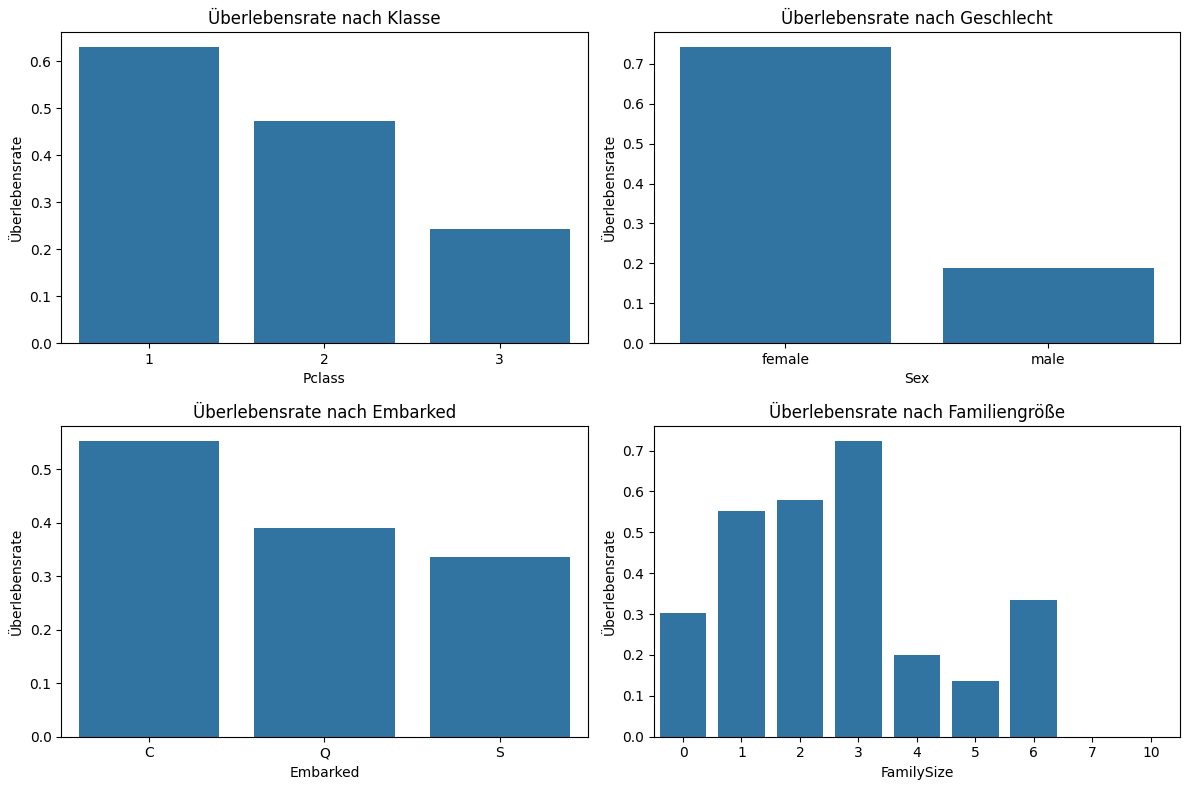

In [46]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Überlebensrate nach Klasse')
plt.ylabel('Überlebensrate')

plt.subplot(2, 2, 2)
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values)
plt.title('Überlebensrate nach Geschlecht')
plt.ylabel('Überlebensrate')

plt.subplot(2, 2, 3)
sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values)
plt.title('Überlebensrate nach Embarked')
plt.ylabel('Überlebensrate')

plt.subplot(2, 2, 4)
sns.barplot(x=survival_by_family.index, y=survival_by_family.values)
plt.title('Überlebensrate nach Familiengröße')
plt.ylabel('Überlebensrate')

plt.tight_layout()
plt.show()